# Comparing pblum methods

Here we'll look into the influence of `pblum_method` on the resulting luminosities as a function of the stellar distortion (only applicable for alternate backends).

Setup
-----------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
import numpy as np
import matplotlib.pyplot as plt

In [3]:
b = phoebe.default_binary()

In [4]:
b.add_dataset('lc')

<ParameterSet: 78 parameters | contexts: figure, dataset, compute, constraint>

In [5]:
b.add_compute('ellc')

<ParameterSet: 30 parameters | datasets: lc01, _default>

And to avoid any issues with falling outside the atmosphere grids, we'll set a simple flat limb-darkening model and disable irradiation.

In [6]:
b.set_value_all('ld_mode', 'manual')
b.set_value_all('ld_func', 'linear')
b.set_value_all('ld_coeffs', [0.5])
b.set_value_all('irrad_method', 'none')

In [7]:
b.set_value_all('atm', 'ck2004')

In [8]:
requiv_max = b.get_value('requiv_max', component='primary', context='component')
requiv_max_factors = np.arange(0.3,1.0,0.05)
sb_pblum_abs = np.zeros_like(requiv_max_factors)
ph_pblum_abs = np.zeros_like(requiv_max_factors)

for i,requiv_max_factor in enumerate(requiv_max_factors):
    b.set_value('requiv', component='primary', value=requiv_max_factor*requiv_max)
    
    sb_pblum_abs[i] = b.compute_pblums(compute='ellc01', pblum_method='stefan-boltzmann', pblum_abs=True)['pblum_abs@primary@lc01'].value
    ph_pblum_abs[i] = b.compute_pblums(compute='ellc01', pblum_method='phoebe', pblum_abs=True)['pblum_abs@primary@lc01'].value

Here we can see that Stefan-Boltzmann (which assumes spherical stars) is an increasingly bad approximation as the distortion of the star increase (as expected).  But even in the quite detached case, the luminosities are not in great agreement.  For this reason it is important to not trust absolute pblum values when using `pblum_method='stefan-boltzmann'`, but rather just use them as a nuisance parameter or original estimate to adjust the light-levels.  

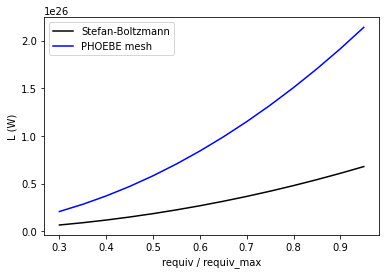

In [9]:
_ = plt.plot(requiv_max_factors, sb_pblum_abs, 'k-', label='Stefan-Boltzmann')
_ = plt.plot(requiv_max_factors, ph_pblum_abs, 'b-', label='PHOEBE mesh')
_ = plt.xlabel('requiv / requiv_max')
_ = plt.ylabel('L (W)')
_ = plt.legend()